## Esercitazione 5  del    19 Marzo 2024 


## Esercizio 1 
Si consideri l'equazione quadratica $x^2 + 2px - q = 0 $ con $p=10^5$ e $q=10^{-i}$, i=0,..,10

- Si stabilisca se il problema relativo al calcolo della soluzione $x= -p+\sqrt{p^2+q}$ risulta essere ben
      condizionato per tutti i valori di q assegnati;

- Si calcoli la soluzione x dell'equazione mediante la formula risolutiva indicata al punto precedente e si dica se l'algoritmo di calcolo risulta numericamente
stabile  per i valori di q assegnati

- si individui una forma stabile per il calcolo della soluzione e si verifichi se l'algoritmo di calcolo risulta numericamente stabile per i valori di q assegnati.

In [1]:
import numpy as np
p=10.0**5
q=10.0**(-np.arange(11))
x=-p+np.sqrt(p**2+q)
print(x) # è ben condizionato

[4.99999442e-06 5.00003807e-07 5.00003807e-08 4.99130692e-09
 4.94765118e-10 4.36557457e-11 1.45519152e-11 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]


## Esercizio 2

Realizzate un codice python che implementa il seguente algoritmo. Si tratta dell'implementazione del  metodo di Archimede per l'approssimazione di pi-greco e genera una successione di valori $p_i$, i=1,n, (n scelto dall'utente) che tende a $\pi$. Verificare se all'aumentare di n, la successione $p_i$ tende a $\pi$.

b[0]=2

s[0]=1

for i in range(1,n):

    p[i]=b[i-1]*s[i-1]
    b[i]=2*b[i-1]
     s[i]=math.sqrt((1.0-math.sqrt(1-s[i-1]**2))/2.0)

- Visualizzate su un grafico gli elementi della successione p[i] calcolata Calcolate e visualizzate su un grafico l'errore relativo per ogni componente di p[i], - considerando come valore esatto di pigreco il valore math.pi.

- Giustificate i risultati alla luce della teoria.

- Proponete una versione stabile dell'algoritmo

- Calcolate e visualizzate su un grafico l'errore relativo per ogni componente di p[i] prodotta dall'algoritmo stabilizzato, considerando come valore esatto di
pigreco il valore math.pi.

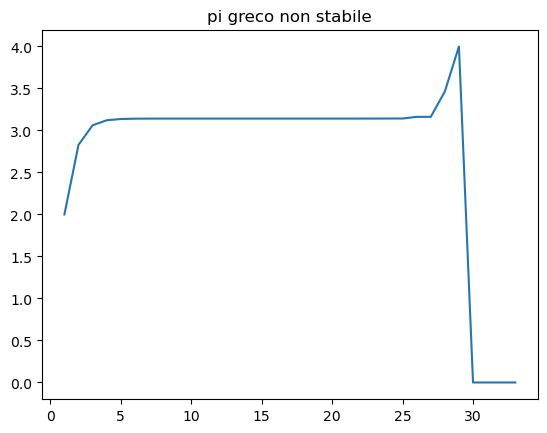

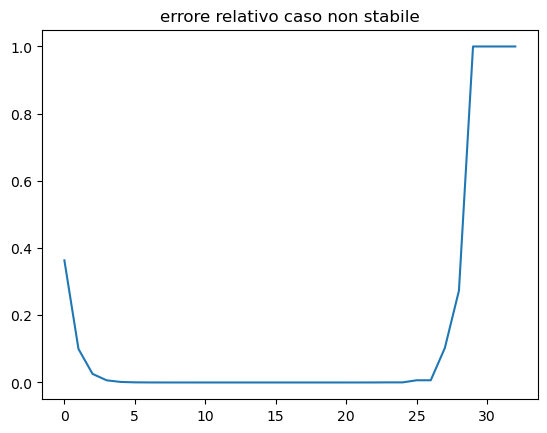

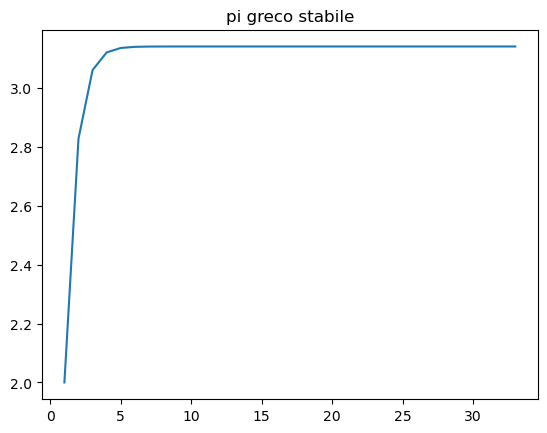

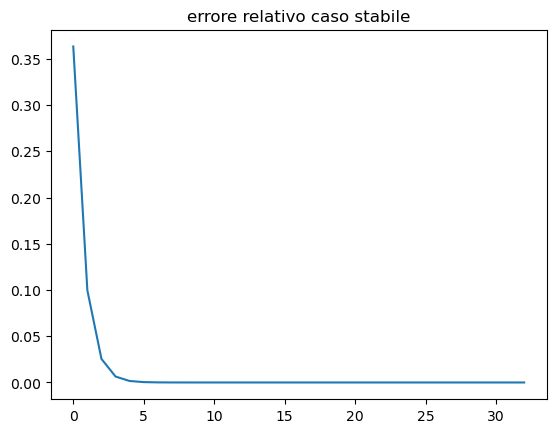

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

n=34
b=np.zeros((n, ))
p=np.zeros((n, ))
p=np.zeros((n, ))
s=np.zeros((n, ))

b[0]=2
s[0]=1

for i in range(1, n):
    p[i]=b[i-1]*s[i-1]
    b[i]=2*b[i-1]
    s[i]=math.sqrt((1.0 - math.sqrt(1-s[i-1]**2))/2.0)
plt.plot(np.arange(1, n), p[1:n])
plt.title("pi greco non stabile")
plt.show()

err_rel=np.abs(p - math.pi) / (np.abs(math.pi))
plt.plot(err_rel[1:n])
plt.title("errore relativo caso non stabile")
plt.show()

for i in range(1, n):
    p[i]=b[i-1]*s[i-1]
    b[i]=2*b[i-1]
    s[i]=math.sqrt(s[i-1]**2 / (2 + 2*np.sqrt(1-s[i-1]**2)))
plt.plot(np.arange(1, n), p[1:n])
plt.title("pi greco stabile")
plt.show()

err_rel=np.abs(p - math.pi) / (np.abs(math.pi))
plt.plot(err_rel[1:n])
plt.title("errore relativo caso stabile")
plt.show()
    

## Esercizio 3   
Si consideri lo sviluppo in serie dell'esponenziale $e^x=1+x+\frac{1}{2!}x^2+\frac{1}{3!}x^3+\cdots =\sum_{k=0}^\infty \frac{x^k}{k!} $. Si calcoli un'approssimazione dell'esponenziale troncando ad N=100 termini la serie, per valori di x che variano da -10 a 10 incluso. Si calcoli  per ogni valore di x l'errore relativo del valore approssimato rispetto al valore esatto, ottenuto mediante la funzione exp della libreria numpy. Cosa si osserva? Pensare ad un algoritmo più stabile ricordando che $e^{-x}=\frac{1}{e^{|x|}}$.



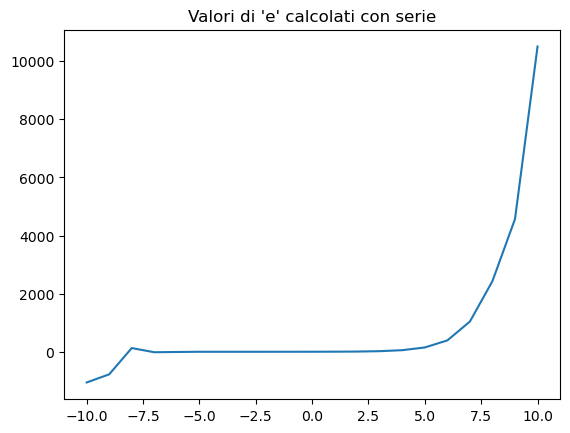

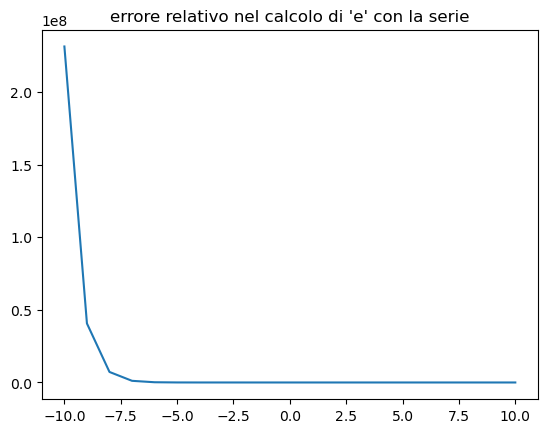

In [3]:
ris = 0
err_rel = 0
x = np.arange(-10, 11)
for k in np.arange(101):
    elem=(x**k) / np.math.factorial(k)
    ris = ris + elem
    err_rel = err_rel + np.abs(elem - np.exp(x)) / np.abs(np.exp(x))
plt.plot(np.arange(-10, 11), ris)
plt.title("Valori di 'e' calcolati con serie")
plt.show()

plt.plot(np.arange(-10, 11), err_rel)
plt.title("errore relativo nel calcolo di 'e' con la serie")
plt.show()

## Esercizio 4
Calcolare l'approssimazione della derivata prima di f(x) = sin(x) in x = 1
mediante l'algoritmo del rapporto incrementale (f(x + h) - f(x))/h per valori decrescenti
di h, confrontandolo con il valore fornito dalla funzione di libreria per f'(x)
mediante calcolo dell'errore relativo.

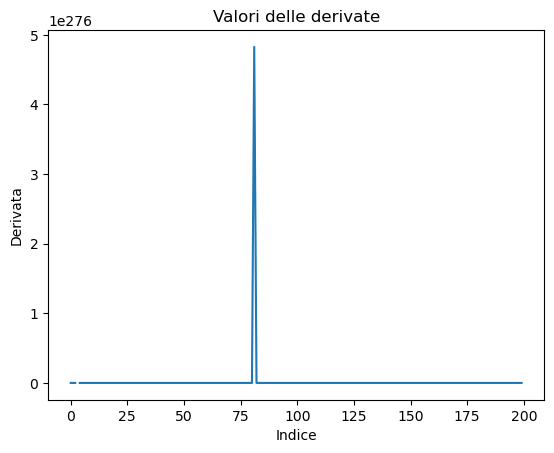

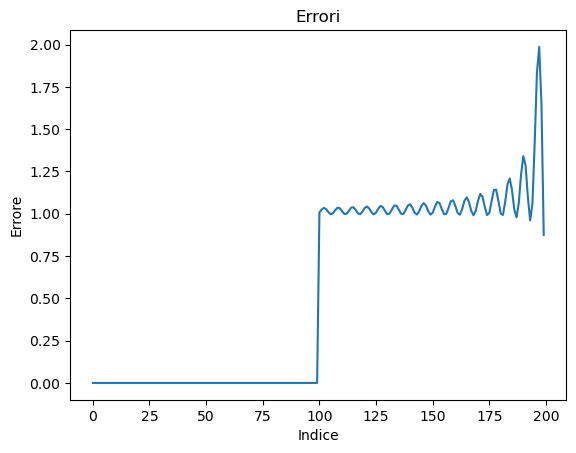

In [4]:
h = 100
x=1
derivate = np.empty((h,))
errors = np.empty((h,))
while (h > 0):
    y=math.sin(x)
    y1 = math.sin(x + h)
    der = (y1 - y) / h
    derivate = np.append(derivate, der)
    error_rel = np.abs(der - math.cos(x)) / np.abs(math.cos(x))
    errors = np.append(errors, error_rel)
    h-=1
plt.plot(derivate)
plt.title('Valori delle derivate')  # Titolo del grafico
plt.xlabel('Indice')  # Etichetta asse x
plt.ylabel('Derivata')  # Etichetta asse y
plt.show()

plt.plot(errors)
plt.title('Errori')  # Titolo del grafico
plt.xlabel('Indice')  # Etichetta asse x
plt.ylabel('Errore')  # Etichetta asse y
plt.show()

## Esercizio 5
Valutazione di un polinomio in un vettore di punti
-   Realizzare una function  che mediante lo schema di Horner  valuti un polinomio in un vettore di punti.
-   Realizzare una function  che utilizzi l’algoritmo classico per valutare un polinomio in un vettore di punti.
-   Valutare   i seguenti polinomi, con i due metodi implementati nei punti precedenti,  sul vettore di punti specificato  e  rappresentarli graficamente. Confrontarne i tempi 

         p(x)=x^8-16x^7+112x^6-448x^5+1120x^4-1792x^3+1792x^2-1024x+256  da valutare su vettore di  1000000 punti equidistanti in [1.8,2.2]
         p(x)= x^11 –8 x^9 +28 x^6 –7 x^4 +12 x^3 –4 x +1   da valutare su vettore di 1000000  punti in [-5:5]
         
Cosa conferma questo esperimento?


Tempo di esecuzione del primo polinomio con Horner: 1.9753084182739258
Tempo di esecuzione del primo polinomio con metodo classico: 3.433529853820801
Tempo di esecuzione del secondo polinomio con Horner: 2.561690330505371
Tempo di esecuzione del secondo polinomio con metodo classico: 4.669169664382935


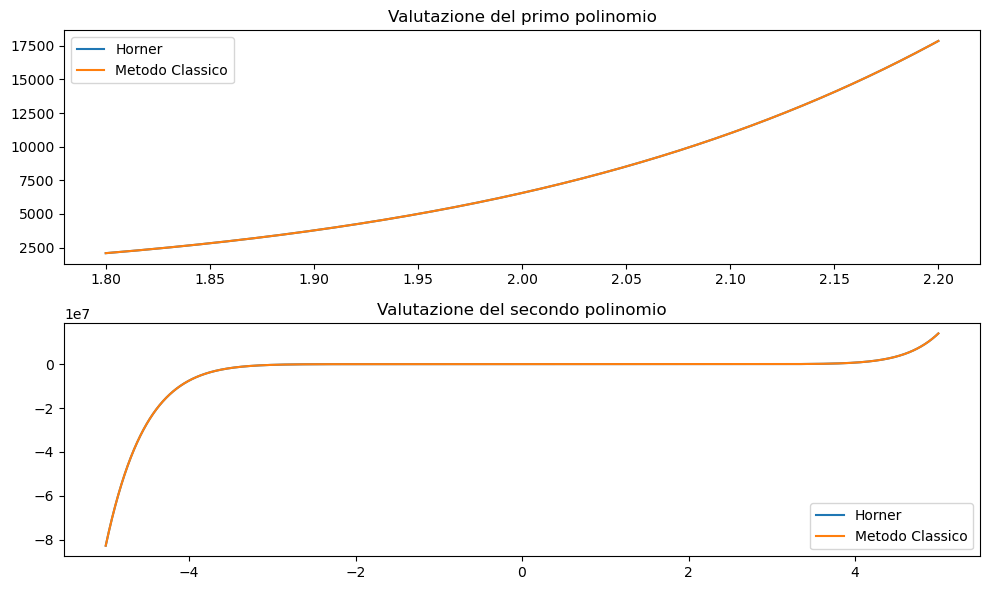

In [5]:
import time
def evaluate_polynomial_horner(coefficients, x):
    values = []
    for point in x:
        result = coefficients[-1]
        # Applica lo schema di Horner per valutare il polinomio
        for coef in reversed(coefficients[:-1]):
            result = result * point + coef
        
        # Aggiungi il valore del polinomio al punto corrente
        values.append(result)
    return values

def evaluate_polynomial_classic(coefficients, x):
    values = []
    for point in x:
        result = 0
        
        # Calcola il valore del polinomio al punto corrente
        for power, coef in enumerate(coefficients):
            result += coef * (point ** power)
        
        values.append(result)
    return values

x = np.linspace(1.8, 2.2, 1000000)
coefficients_p1 = [1, -16, 112, -448, 1120, -1792, 1792, -1024, 256]
y = np.linspace(-5, 5, 1000000)
coefficients_p2 = [1, 0, -8, 0, 0, 28, 0, -7, 12, 0, -4, 1]

# Misura e confronta i tempi di esecuzione per il primo polinomio
start_time_horner = time.time()
values_horner_p1 = evaluate_polynomial_horner(coefficients_p1, x)
end_time_horner = time.time()
execution_time_horner_p1 = end_time_horner - start_time_horner

start_time_classic = time.time()
values_classic_p1 = evaluate_polynomial_classic(coefficients_p1, x)
end_time_classic = time.time()
execution_time_classic_p1 = end_time_classic - start_time_classic

# Misura e confronta i tempi di esecuzione per il secondo polinomio
start_time_horner = time.time()
values_horner_p2 = evaluate_polynomial_horner(coefficients_p2, y)
end_time_horner = time.time()
execution_time_horner_p2 = end_time_horner - start_time_horner

start_time_classic = time.time()
values_classic_p2 = evaluate_polynomial_classic(coefficients_p2, y)
end_time_classic = time.time()
execution_time_classic_p2 = end_time_classic - start_time_classic

# Confronta i tempi di esecuzione
print("Tempo di esecuzione del primo polinomio con Horner:", execution_time_horner_p1)
print("Tempo di esecuzione del primo polinomio con metodo classico:", execution_time_classic_p1)
print("Tempo di esecuzione del secondo polinomio con Horner:", execution_time_horner_p2)
print("Tempo di esecuzione del secondo polinomio con metodo classico:", execution_time_classic_p2)

# Plot dei risultati
plt.figure(figsize=(10, 6))

# Plot per il primo polinomio
plt.subplot(2, 1, 1)
plt.plot(x, values_horner_p1, label='Horner')
plt.plot(x, values_classic_p1, label='Metodo Classico')
plt.title('Valutazione del primo polinomio')
plt.legend()

# Plot per il secondo polinomio
plt.subplot(2, 1, 2)
plt.plot(y, values_horner_p2, label='Horner')
plt.plot(y, values_classic_p2, label='Metodo Classico')
plt.title('Valutazione del secondo polinomio')
plt.legend()

plt.tight_layout()
plt.show()

## Esercizio 6
Realizzare un codice python che calcola il valore del polinomio p(x)=(x-2)^8 utilizzando le formule

    p=x^8-16x^7+112x^6-448x^5+1120x^4-1792x^3+1792x^2-1024x+256;
    p(x)=(x-2)^8
    e lo schema di Horner

e ne realizza il grafico in un vettore di 10000 equidistanti nell’intervallo [1.8,2.2], [1.9, 2.1],  [1.92,2.08], [1.93,2.07], [1.94,2.06] Spiegare il comportamento osservato. Cosa succede al restringersi dell’intervallo intorno al valore 2, punto in cui questo polinomio si annulla?


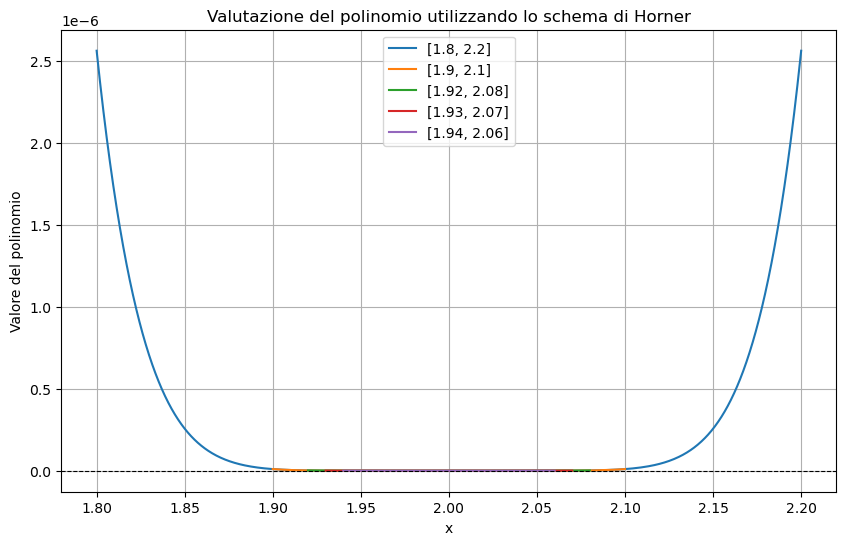

In [6]:
def evaluate_polynomial_horner(coefficients, x):
    values = []
    for point in x:
        result = coefficients[-1]
        # Applica lo schema di Horner per valutare il polinomio
        for coef in reversed(coefficients[:-1]):
            result = result * point + coef
        
        # Aggiungi il valore del polinomio al punto corrente
        values.append(result)
    return values

# Coefficienti del polinomio (calcolati esplicitamente)
coefficients_explicit = [1, -16, 112, -448, 1120, -1792, 1792, -1024, 256]

# Coefficienti del polinomio (per lo schema di Horner)
coefficients_horner = [256, -1024, 1792, -1792, 1120, -448, 112, -16, 1]

# Genera vettori di punti equidistanti per gli intervalli specificati
x_intervals = [np.linspace(start, end, 10000) for start, end in [(1.8, 2.2), (1.9, 2.1), (1.92, 2.08), (1.93, 2.07), (1.94, 2.06)]]

# Calcola i valori del polinomio utilizzando lo schema di Horner per ciascun intervallo
values_horner = [evaluate_polynomial_horner(coefficients_horner, x) for x in x_intervals]

# Plot dei risultati
plt.figure(figsize=(10, 6))
for i, interval in enumerate([(1.8, 2.2), (1.9, 2.1), (1.92, 2.08), (1.93, 2.07), (1.94, 2.06)]):
    plt.plot(x_intervals[i], values_horner[i], label=f'[{interval[0]}, {interval[1]}]')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)
plt.title('Valutazione del polinomio utilizzando lo schema di Horner')
plt.xlabel('x')
plt.ylabel('Valore del polinomio')
plt.legend()
plt.grid(True)
plt.show()